# Back to Basic: Detection of Fake News Using Traditional Machine Learning Classifiers

In [5]:
#%reload_ext watermark
#%watermark -a "Cheuk Yu IP, Fu-kay LI Frankie" -u -d -p numpy,pandas,matplotlib

## Overview

We choose the dataset extracted from the Chinese COVID-19 Fake News Dataset (CHECKED) prepared by Yang et al. 2021. The CHECKED data set contained 2,104 verified microblogs related to COVID-19 between December 2019 and August 2020 from Weibo, one of the most popular social media platform in China.  The true news microblogs were collected from the Weibo account of China Daily , the largest newspaper group in China, and the fake news microblogs were collected from Weibo Community Management Center , an official platform providing fact-check results of suspected fake news.  Of the 2104 microblogs, 1760 were labelled “Real” (true news) and 344 were labelled “Fake” (fake news).  Auxiliary information of each selected microblog, namely (i) number of comments (comment_num), (ii) number re-post (repost_num) and (iii) number of likes (like_num) of each microblog from CHECKED were also extracted.  Other details of the microblogs in CHECKED, including details of reposts, contend of 1,185,702 comments were not used in this paper for simplicity.  

In the data cleaning process, we manually verified the content of each dataset and found that the contextual meaning of 13 out of 2104 microblog should be classified as "opinion", i.e. neither true or fake news.  For the sake of fairness in training, we removed these 13 items.  The total number of microblog in our data set remains 2,091 (including 344 fake news and 1,747 real news).

We further analyzed different quantitative textual features of each of the 2,091 microblogs and modified the datasets by creating additional features that we belive they are significant in differentiating fake news and true news:

1.	Comment_num: Number of comments of the microblog.
2.  Repost_num: Number of re-post of the microblog.
3.  Like_num: Number of "Likes" awarded to the microblog by readers.
4.  CntWord: Total number of words of the microblog.
5.	WordPerSentence: Average number of words per sentence.
6.	TitleLen: Total number of words of the title.
7.	TitleCnt_Exclaimation: Total number of exclamation mark (!) in the title.
8.	TitleCnt_Question: Total number of question mark (?) in the title.
9.	TextCnt_Exclaimation: Total number of exclamation mark (!) in the text.
10.	TextCnt_Question: Total number of question mark (?) in the text.


### Note:

The original datasets can be found the dataset download links at: https://github.com/cyang03/CHECKED/tree/master/dataset

fake_news.csv 
https://drive.google.com/file/d/1AYH9QEilpwGGNkI2_PVOKJmU5fCVsWIX/ 
true_news.csv
https://drive.google.com/file/d/17PqIetV03JJHqajOim0ZfHhHS2P3UwrJ/ 

We imported the csv files into a Excel spreadsheet (called: News_DataSet_Analyzed_value.xlsx) and modified the datasets by extracting features and removed [13] records from the real_news spreadsheet. Based on the Excel spreadsheet, we generated two csv data files called "fake_news_modified.csv" and "real_news_modified.csv"
We also removed two "text" and "title" data column and add label to identify (marked real = 0, fake = 1) for the training and testing data

## Reading-in the CHECKED- Chinese COVID-19 fake news dataset

In [6]:
import os
import pandas as pd

fn = pd.read_csv('fake_news_modified_v2.csv',
                 index_col=0)
# Show number of fake news read
print(fn.shape[0])
fn.head()

344


,label,comment_num,repost_num,like_num,CntWord,WordPerSentence,TitleLen,TitleCnt_Exclaimation,TitleCnt_Question,TextCnt_Exclaimation,TextCnt_Question
label_text,,,,,,,,,,,
fake,1,4,2,30,113,113.0,0,0,0,0,0
fake,1,0,0,0,67,67.0,0,0,0,1,0
fake,1,3,2,4,111,111.0,27,0,0,0,0
fake,1,0,0,0,229,45.8,0,0,0,2,0
fake,1,16,2,9,115,38.3,0,0,0,0,0


In [7]:
rn = pd.read_csv('real_news_modified_v2.csv',
                 index_col=0)
# Show number of real new read
print(rn.shape[0])
rn.head()

1747


,label,comment_num,repost_num,like_num,CntWord,WordPerSentence,TitleLen,TitleCnt_Exclaimation,TitleCnt_Question,TextCnt_Exclaimation,TextCnt_Question
label_text,,,,,,,,,,,
real,0,396,601,3955,169,42.3,23,1,0,0,0
real,0,765,345,4949,441,44.1,26,0,0,0,0
real,0,670,606,3510,108,108.0,21,0,0,0,0
real,0,2471,10110,23223,123,61.5,14,0,0,2,0
real,0,354,255,1980,180,90.0,17,0,0,0,0


In [8]:
# Combine these two records
df = pd.concat([fn,rn])
# Show number of total number of records
print(df.shape[0])
df.tail()

2091


,label,comment_num,repost_num,like_num,CntWord,WordPerSentence,TitleLen,TitleCnt_Exclaimation,TitleCnt_Question,TextCnt_Exclaimation,TextCnt_Question
label_text,,,,,,,,,,,
real,0,2091,263,21436,101,50.5,18,0,0,1,0
real,0,6067,8209,311841,168,56.0,29,0,0,1,0
real,0,2009,1784,41240,168,84.0,18,0,0,0,0
real,0,659,539,5327,149,74.5,16,0,0,0,0
real,0,1841,2186,16558,141,28.2,16,0,0,3,0


In [9]:
df.head()

,label,comment_num,repost_num,like_num,CntWord,WordPerSentence,TitleLen,TitleCnt_Exclaimation,TitleCnt_Question,TextCnt_Exclaimation,TextCnt_Question
label_text,,,,,,,,,,,
fake,1,4,2,30,113,113.0,0,0,0,0,0
fake,1,0,0,0,67,67.0,0,0,0,1,0
fake,1,3,2,4,111,111.0,27,0,0,0,0
fake,1,0,0,0,229,45.8,0,0,0,2,0
fake,1,16,2,9,115,38.3,0,0,0,0,0


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Training various models with standardized datasets using the scikit-learn

- The 10 features of the dataset are extracted for training.
- Class lable 0 refers to true news, 1 refers to fake news.

In [12]:
from sklearn import datasets

#We extract all features for training. We do not know which features are most relevant at this moment.

#X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10]].values
X = df.iloc[:, [7,8,9,10]].values
y = df.iloc[:, 0].values

print('Class labels:', np.unique(y))

Class labels: [0 1]


In [13]:
# shuffles the training datasets internally before splitting
# stratify=y means: have the same proportions of class labels as the input dataset
# split the X and y arrays into 30 percent test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# show the shape of the ndarray 
#X_train.shape
#X_test.shape

In [14]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [1747  344]
Labels counts in y_train: [1222  241]
Labels counts in y_test: [525 103]


In [15]:
# feature scaling for optimal performance
from sklearn.preprocessing import StandardScaler

# initialized a new StandardScaler object
sc = StandardScaler()

# estimaed the parameters of sample mean and standard deviation
sc.fit(X_train)

# standardized the training data with the estimated mean and standard deviation
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Training and testing dataset with a perceptron model

In [16]:
# Train a perceptron model
from sklearn.linear_model import Perceptron

# initialized a new Perceptron object and trained the model via the fit method
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

from sklearn.metrics import accuracy_score

print('Training accuracy: %.3f' % ppn.score(X_train_std, y_train))
print('Test accuracy: %.3f' % ppn.score(X_test_std, y_test))


Misclassified examples: 107
Training accuracy: 0.805
Test accuracy: 0.830


### Training and testing dataset with a KNN model

In [17]:
# Train a KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Training accuracy: %.3f' % knn.score(X_train_std, y_train))
print('Test accuracy: %.3f' % knn.score(X_test_std, y_test))


Misclassified examples: 92
Training accuracy: 0.841
Test accuracy: 0.854


### Training and testing dataset with a Logistic Regression model

In [18]:
# Train a LogisticRegression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

print('Training accuracy: %.3f' % lr.score(X_train_std, y_train))
print('Test accuracy: %.3f' % lr.score(X_test_std, y_test))


Misclassified examples: 97
Training accuracy: 0.847
Test accuracy: 0.846


### Training and testing the dataset with an SVM model

In [19]:
#Train a SVM with RBF kernel
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=10, gamma=0.03, C=1.0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

print('Training accuracy %.3f' % svm.score(X_train_std, y_train))
print('Test accuracy %.3f' % svm.score(X_test_std, y_test))


Misclassified examples: 99
Training accuracy 0.842
Test accuracy 0.842


### Training and testing the dataset with a Decision Tree model

In [20]:
# Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=3, 
                                    random_state=1)
tree_model.fit(X_train_std, y_train)

y_pred = tree_model.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

print('Training accuracy: %.3f' % tree_model.score(X_train_std, y_train))
print('Test accuracy: %.3f' % tree_model.score(X_test_std, y_test))

Misclassified examples: 94
Training accuracy: 0.848
Test accuracy: 0.850


### Training and testing the dataset with a Random Forest model

In [21]:
# Train a Random Forest model

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)

forest.fit(X_train_std, y_train)
y_pred = forest.predict(X_test_std)

print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Training accuracy: %.3f' % forest.score(X_train_std, y_train))
print('Test accuracy: %.3f' % forest.score(X_test_std, y_test))


Misclassified examples: 93
Training accuracy: 0.850
Test accuracy: 0.852


## Find the Most Relevant Features in Fake News Classification

#### Select 25% of sample data for testing

In [22]:
#This part is the Sequential feature selection algorithms
#Now only 25% of sample is selected for testing

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

### Check the accuracy of perceptron using diffent number of features

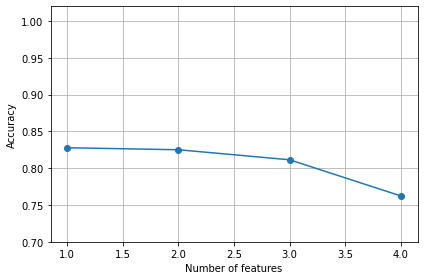

Index(['TitleCnt_Exclaimation', 'TextCnt_Exclaimation'], dtype='object')


In [32]:
#Check the accuracy of Perceptron classifier on various number of features

# selecting features
sbs = SBS(ppn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.savefig('images/ppn.png', dpi=300)
plt.show()

feat = list(sbs.subsets_[2])
print(df.columns[7:][feat])


### Check the accuracy of KNN model using diffent number of features

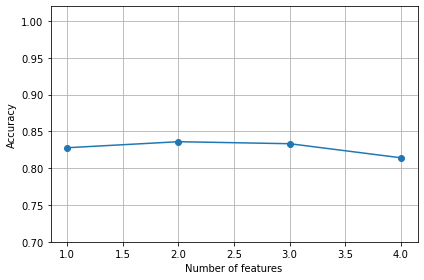

Index(['TitleCnt_Exclaimation', 'TextCnt_Exclaimation'], dtype='object')


In [33]:
#Check the accuracy of KNN model on various number of features

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.savefig('images/knn.png', dpi=300)
plt.show()

#The result shows even 1 feature could achieve very high accuracy
#By using 2 features, namely Comment_num and Title_Len, we achieve the highest accuracy.

feat = list(sbs.subsets_[2])
print(df.columns[7:][feat])

### Check the accuracy of Logistic Regression model using diffent number of features

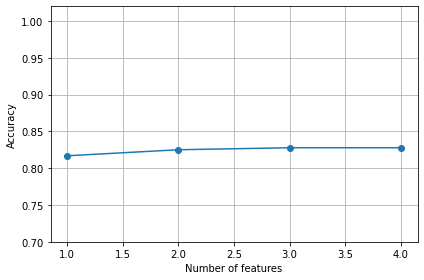

Index(['TitleCnt_Exclaimation', 'TextCnt_Exclaimation'], dtype='object')


In [34]:
#Check the accuracy of Logistic Regression model on various number of features

# selecting features
sbs = SBS(lr, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.savefig('images/lr.png', dpi=300)
plt.show()

#The result shows even 1 feature could achieve very high accuracy
#By using 3 features, namely Comment_num, Like_num and TitleLen, we achieve the highest accuracy.

feat = list(sbs.subsets_[2])
print(df.columns[7:][feat])

### Check the accuracy of SVM model using diffent number of features

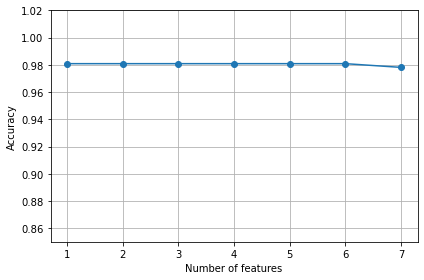

Index(['CntWord', 'TitleLen'], dtype='object')


In [34]:
#Check the accuracy of SVM classifier on various number of features

# selecting features
sbs = SBS(svm, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.85, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.savefig('images/svm.png', dpi=300)
plt.show()

feat = list(sbs.subsets_[2])
print(df.columns[7:][feat])

### Check the accuracy of Decision Tree model using diffent number of features

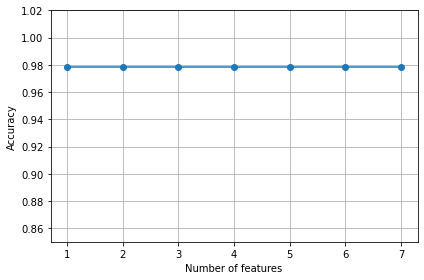

Index(['CntWord', 'WordPerSentence', 'TitleLen'], dtype='object')


In [35]:
#Check the accuracy of Decision Tree classifier on various number of features

# selecting features
sbs = SBS(tree_model, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.85, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.savefig('images/tree_model.png', dpi=300)
plt.show()

feat = list(sbs.subsets_[4])
print(df.columns[4:][feat])

### Check the accuracy of Random Forest using diffent number of features

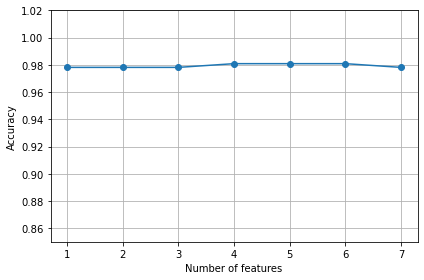

Index(['CntWord', 'WordPerSentence', 'TitleLen'], dtype='object')


In [36]:
#Check the accuracy of Random Forest classifier on various number of features

# selecting features
sbs = SBS(forest, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.85, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.savefig('images/forest.png', dpi=300)
plt.show()

k3 = list(sbs.subsets_[4])
print(df.columns[4:][k3])


### Rank the importance of features

 1) TitleLen                       0.700557
 2) CntWord                        0.172884
 3) WordPerSentence                0.061634
 4) TextCnt_Exclaimation           0.034024
 5) TitleCnt_Exclaimation          0.019416
 6) TextCnt_Question               0.008164
 7) TitleCnt_Question              0.003322


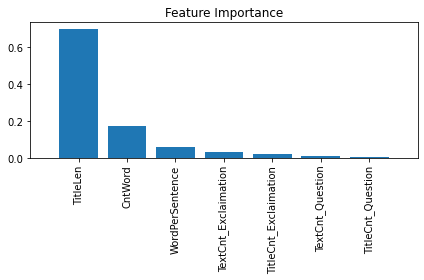

In [37]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[4:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('images/forest_feature.png', dpi=300)
plt.show()

#Note: For random forest technique, if two or more features are highly correlated, one feature may be ranked
#very highly while the information on the other feature may not be fully captured.